__Network: ResNet-50__

## Declaring Dependencies

In [1]:
import os
import keras
import numpy as np
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Image Folder Paths

In [2]:
data_path=os.path.abspath('data_set')
print(data_path)

/home/jalashwa/Documents/Keras_Test/data_set


In [3]:
data_path_list = os.listdir(data_path)
print(data_path_list)

['bad', 'good']


## Loading Image data

In [4]:
img_data_list=[]

In [5]:
for dataset in data_path_list:
    data_folder=os.path.join(data_path,dataset)
    img_list=os.listdir(data_folder)
    print ('Loading the contents of Dataset-',dataset)
    for img in img_list:
        img_path=os.path.join(data_path,dataset,img)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        print('Image shape:', x.shape)
        img_data_list.append(x)

Loading the contents of Dataset- bad
Image shape: (1, 224, 224, 3)
Image shape: (1, 224, 224, 3)
Image shape: (1, 224, 224, 3)
Image shape: (1, 224, 224, 3)
Loading the contents of Dataset- good
Image shape: (1, 224, 224, 3)
Image shape: (1, 224, 224, 3)
Image shape: (1, 224, 224, 3)
Image shape: (1, 224, 224, 3)


In [6]:
img_data = np.array(img_data_list)
img_data=np.rollaxis(img_data,1,0)
img_data=img_data[0]
print(img_data.shape)

(8, 224, 224, 3)


## Image Labels

In [7]:
num_classes = 2
num_samples = img_data.shape[0]
print(num_samples)

8


In [8]:
labels = np.ones((num_samples,),dtype='int64')
labels[0:4]=0
labels[4:8]=1
print(labels)

[0 0 0 0 1 1 1 1]


In [9]:
img_label = np_utils.to_categorical(labels, num_classes)
print(img_label)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## Neural Network Model Declaration and Modiciation

In [10]:
def create_network():
    old_model=keras.applications.resnet50.ResNet50()
    old_model.layers.pop()
    new_layer = Dense(2, activation='softmax', name='Final_dense')
    input_nw = old_model.input
    output_nw = new_layer(old_model.layers[-1].output)
    new_model=Model(input_nw,output_nw)
    return new_model

In [11]:
new_network=create_network()

In [12]:
new_network.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [13]:
for layer in new_network.layers:
    layer.trainable = False

In [14]:
for layer in new_network.layers:
    print(layer, layer.trainable)

<keras.engine.topology.InputLayer object at 0x7f2ec857c438> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f2ec860f128> False
<keras.layers.convolutional.Conv2D object at 0x7f2ec860f358> False
<keras.layers.normalization.BatchNormalization object at 0x7f2ec88add30> False
<keras.layers.core.Activation object at 0x7f2ec860f470> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2ec8067dd8> False
<keras.layers.convolutional.Conv2D object at 0x7f2ec857c5c0> False
<keras.layers.normalization.BatchNormalization object at 0x7f2ec8091470> False
<keras.layers.core.Activation object at 0x7f2ebefe6710> False
<keras.layers.convolutional.Conv2D object at 0x7f2ebef94400> False
<keras.layers.normalization.BatchNormalization object at 0x7f2ebef94cf8> False
<keras.layers.core.Activation object at 0x7f2ebef7bc88> False
<keras.layers.convolutional.Conv2D object at 0x7f2ebc078c18> False
<keras.layers.convolutional.Conv2D object at 0x7f2ea4a83ba8> False
<keras.layers.normalization.BatchNo

## Implementing K Fold & Model Training

In [15]:
x,y = shuffle(img_data,img_label, random_state=2)

Number of folds = 3
Fold 1
Train: [3 4 5 6 7] VAL: [0 1 2]
Train on 5 samples, validate on 3 samples
Epoch 1/2
 - 3s - loss: 0.7054 - acc: 0.4000 - val_loss: 1.2878 - val_acc: 0.3333
Epoch 2/2
 - 1s - loss: 0.7054 - acc: 0.4000 - val_loss: 1.2878 - val_acc: 0.3333


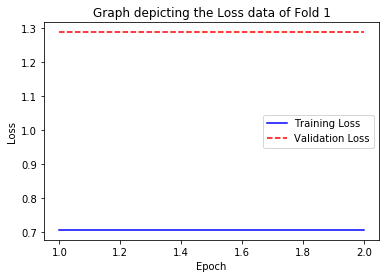

Fold 2
Train: [0 1 2 6 7] VAL: [3 4 5]
Train on 5 samples, validate on 3 samples
Epoch 1/2
 - 2s - loss: 0.7043 - acc: 0.4000 - val_loss: 1.2602 - val_acc: 0.6667
Epoch 2/2
 - 1s - loss: 0.7043 - acc: 0.4000 - val_loss: 1.2602 - val_acc: 0.6667


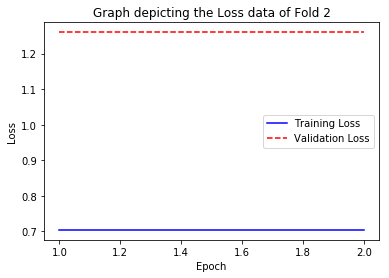

Fold 3
Train: [0 1 2 3 4 5] VAL: [6 7]
Train on 6 samples, validate on 2 samples
Epoch 1/2
 - 2s - loss: 0.6993 - acc: 0.5000 - val_loss: 1.0961 - val_acc: 0.5000
Epoch 2/2
 - 1s - loss: 0.6993 - acc: 0.5000 - val_loss: 1.0961 - val_acc: 0.5000


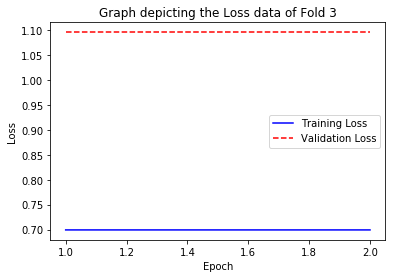

In [16]:
kf = KFold(n_splits=3)
num_folds = kf.get_n_splits(x)
print('Number of folds =',num_folds)
fold =0
for train_idx, val_idx in kf.split(x):
    fold+=1
    print('Fold',fold)
    print("Train:", train_idx, "VAL:",val_idx)
    x_train = x[train_idx]
    y_train = y[train_idx]
    x_val = x[val_idx]
    y_val = y[val_idx]
    csv_logger = CSVLogger('ResNet_Log_Fold'+str(fold)+'.csv', append=False, separator=',')
    new_network.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    new_network.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2, verbose=2, callbacks=[csv_logger])
    training_loss = new_network.history.history['loss']
    valid_loss = new_network.history.history['val_loss']
    epoch_count = range(1, len(training_loss) + 1)
    plt.plot(epoch_count, training_loss, 'b-')
    plt.plot(epoch_count, valid_loss, 'r--')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Graph depicting the Loss data of Fold {}'.format(fold))
    plt.savefig('ResNet_Loss_Graph_Fold_'+str(fold))
    plt.show()
    new_network.save('ResNet_Data_Fold'+str(fold)+'.h5')   

## Making Predictions

In [17]:
test_path=os.path.abspath('data_predictions')
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['bad', 'good'], batch_size=8, shuffle=False)

Found 8 images belonging to 2 classes.


In [18]:
test_batches.class_indices

{'bad': 0, 'good': 1}

In [19]:
test_labels=test_batches.classes
print(test_labels)

[0 0 0 0 1 1 1 1]


In [20]:
predictions = new_network.predict_generator(test_batches, steps=1, verbose=0)

In [21]:
predictions

array([[0.82481086, 0.17518914],
       [0.65475655, 0.34524345],
       [0.75921303, 0.24078695],
       [0.88618916, 0.1138108 ],
       [0.8672487 , 0.13275133],
       [0.66475725, 0.33524278],
       [0.85006225, 0.1499377 ],
       [0.794678  , 0.20532203]], dtype=float32)

In [22]:
predict_labels= predictions.argmax(axis=1)
print(predict_labels)

[0 0 0 0 0 0 0 0]


## Plotting the Confusion Matrix

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('ResNet_Confusion_Matrix')

In [24]:
cm = confusion_matrix(test_labels, predict_labels)

In [25]:
test_batches.class_indices

{'bad': 0, 'good': 1}

Confusion matrix, without normalization
[[4 0]
 [4 0]]


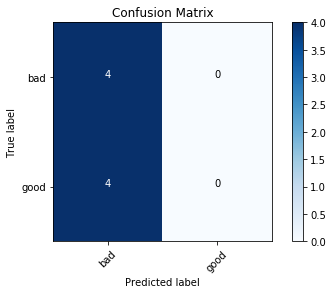

In [26]:
cm_plot_labels = ['bad','good']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')